In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Read scraped data into pandas dataframe
df = pd.read_csv('kbb_scrape_data.csv')

#Remove extra column 
df = df.drop('Unnamed: 0', axis = 1)

#Create column that contains the type of car (New, Used, or Certified)
split = df['car'].str.split(' ')
df['type'] = split.str.get(0)

#Create column for the year the car was manufactured and save as an integer
df['year'] = split.str.get(1).astype(int)

#Create column for that contains the category of the car (SUV, Sedan, Coupe, Hatchback, Convertible, Van/Minivan, Wagon, Pickup)
df['category'] = split.str.get(-1)

#Convert starting price from $ value into an integer
df['starting_price'] = df['starting_price'].replace(r'[\$,]', '', regex = True).astype(int) 

#Remove mpg from integer value and also remove cars that are electric/hybrids with a total combined mpg larger than 80 mpg
mpg_split = df['combined_mpg'].str.split(' ')
df['combined_mpg'] = mpg_split.str.get(0).astype(int)
df = df[df.combined_mpg < 80]

#Convert expert rating into a float
df['expert_rating'] = df['expert_rating'].astype(float)

#Convert consumer_rating into a float
df['consumer_rating'] = df['consumer_rating'].astype(float)

In [ ]:
#Create dummy variables for both type and category columns
df = pd.get_dummies(df, columns=['type', 'category'])

#Create dataframe for independent variables
x = df[['combined_mpg', 'expert_rating', 'consumer_rating', 'year',
       'type_Certified', 'type_New', 'type_Used', 'category_Convertible',
       'category_Coupe', 'category_Hatchback', 'category_Pickup',
       'category_SUV', 'category_Sedan', 'category_Van/Minivan',
       'category_Wagon']]

#Create dataframe for dependent variables
y = df['starting_price']

#Create training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

#Fit multi linear regression model with training set
regression = LinearRegression()
regression.fit(x_train, y_train)

#Create prediction for starting price using testing set
y_predict = regression.predict(x_test)

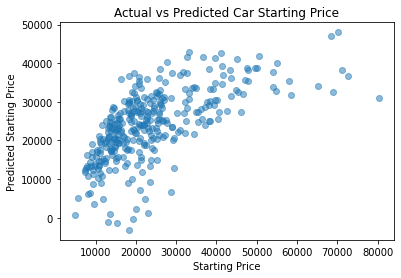

In [1]:
#Graph the actual starting price vs the predicted starting price 
plt.scatter(y_test, y_predict, alpha=0.5)
plt.title('Actual vs Predicted Car Starting Price')
plt.xlabel('Starting Price')
plt.ylabel('Predicted Starting Price')
plt.show()

In [2]:
#Print the coefficents for each independent variables 
print(regression.coef_)

[ -887.81841741  3093.71327968  6682.62730291  2793.77966083
 -2036.46220428  4237.18927683 -2200.72707254  6463.60710163
  4041.13109434   298.71936377 -7453.57696167   999.11367448
  1079.13395294 -6489.61703385  1061.48880836]


In [3]:
#Print the score of the training set vs the score of the testing test
print(regression.score(x_train, y_train))
print(regression.score(x_test, y_test))

0.43510419057977334
0.408701030323952
